## Final Project Submission

Please fill out:
* Student name: Godfrey Osundwa, Mitchel Mkan, Lameck Odallo, Elizabeth Kiilu
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


**Beginning**

The global film industry is one of the most influential and profitable entertainment sectors, generating billions of dollars annually across theaters, streaming, and merchandising. As audience preferences evolve and competition intensifies, studios and investors must carefully evaluate what drives box office success. This project explores key factors such as **genre trends, studio performance, audience ratings, and blockbuster economics** to identify patterns and opportunities in global cinema revenues.

**Overview**

This analysis examines worldwide gross earnings of films across multiple genres, studios, and years, complemented by viewer ratings from IMDb,TMDB, BOM and RT. By combining descriptive analytics, trend visualization, and correlation analysis, the project seeks to uncover:

  **Which genres consistently generate the highest revenue.**

  **How studios differ in performance across genres.**

  **The role of ratings (quality perception) versus franchise power in determining box office success.**

 **The impact of blockbuster outliers on overall market dynamics.**

The findings provide both strategic insights for major studios looking to maximize global returns and practical guidance for smaller studios seeking to identify profitable niches.

**Business Understanding**

The central business problem addressed is:
**“What factors most strongly influence worldwide box office performance, and how can studios optimize production and investment decisions accordingly?”**

From a business standpoint, the analysis supports:

Major studios: deciding whether to continue investing heavily in franchises/IP or diversify into new genres.

Mid-tier & independent studios: identifying under-served genres where lower-budget films can still achieve profitability.

Investors & stakeholders: understanding the balance between audience ratings, critical reception, and franchise appeal in driving revenue.

Ultimately, the business objective is to provide actionable insights that help industry players maximize profitability while minimizing risk in an increasingly competitive global film market.

**Data Understanding**

The dataset combines information from multiple sources, covering films released worldwide between 2010–2018. The main features include:

**Movie Information: title, release year, runtime, primary genre, and studio.**

**Financial Performance: worldwide gross earnings (box office revenue).**
**Ratings: IMDb and TMDB average ratings, reflecting audience reception.**

**Aggregated Features: computed metrics such as total, mean, and median gross by studio and genre.**

Data Quality & Preparation

Missing values in runtime and ratings were handled by dropping or imputing when necessary.

Gross earnings were filtered to remove zero or invalid entries.

Outliers (extreme blockbusters) were analyzed separately rather than removed, since they are strategically important.

Categorical variables (genre, studio) were standardized for grouping and pivot analysis.

This prepared dataset ensures reliability for both descriptive and exploratory analysis.

**Data Analysis**


**Lets Import Necessary Tools**

In [16]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os


**Loading The Data to Jupyter Notebook**

**The Numbers**


Data Exploration (What is in the zippedData)

In [17]:
import os

data_path = r"C:\Users\G-Osundwa\Documents\phase2\g1project\dsc-phase-2-project-v3\zippedData"

print(os.listdir(data_path))  # See which files are inside

['bom.movie_gross.csv.gz', 'im.db', 'im.db.zip', 'rt.movie_info.tsv.gz', 'rt.reviews.tsv.gz', 'tmdb.movies.csv.gz', 'tn.movie_budgets.csv.gz']


In [18]:
#Using absolute path

tn = pd.read_csv(
    r"C:\Users\G-Osundwa\Documents\phase2\g1project\dsc-phase-2-project-v3\zippedData\tn.movie_budgets.csv.gz"
)
print(tn.shape)
print(tn.head())

(5782, 6)
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  


**Box Office Mojo**

bom = pd.read_csv(f"{data_path}/bom.movie_gross.csv.gz")
print(bom.shape)
print(bom.head())
print(bom.columns)

In [19]:
data_path = r"C:\Users\G-Osundwa\Documents\phase2\g1project\dsc-phase-2-project-v3\zippedData"

tn = pd.read_csv(f"{data_path}/tn.movie_budgets.csv.gz")
print(tn.shape)
print(tn.head())
print(tn.columns)

(5782, 6)
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [20]:
#lets get to know the names of the coluns in our idmb dataset
db_path = r"C:\Users\G-Osundwa\Documents\phase2\g1project\dsc-phase-2-project-v3\zippedData\im.db"

# connect to the database
conn = sqlite3.connect(db_path)

# check available tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

conn

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [21]:
#What is the size of our dataset
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)

print(movie_basics.shape)
print(movie_ratings.shape)

(146144, 6)
(73856, 3)


In [22]:
#We will need to pull full data
imdb_full = (
    movie_basics
    .merge(movie_ratings, on="movie_id", how="inner")  # inner keeps only rated films
    .rename(columns={"primary_title": "title", "start_year": "year"})
)

print(imdb_full.shape)
print(imdb_full.head())


(73856, 8)
    movie_id                            title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   year  runtime_minutes                genres  averagerating  numvotes  
0  2013            175.0    Action,Crime,Drama            7.0        77  
1  2019            114.0       Biography,Drama            7.2        43  
2  2018            122.0                 Drama            6.9      4517  
3  2018              NaN          Comedy,Drama            6.1        13  
4  2017             80.0  Comedy,Drama,Fantasy            6.5       119  


**THE MOVIE DB TMDB**

In [8]:
tmdb = pd.read_csv(f"{data_path}/tmdb.movies.csv.gz")
print(tmdb.shape)
print(tmdb.head())
print(tmdb.columns)

(26517, 10)
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  


**ROTTEN TOMATOES**

In [9]:
rt_info = pd.read_csv(f"{data_path}/rt.movie_info.tsv.gz", sep="\t")
print(rt_info.shape)
print(rt_info.head())
print(rt_info.columns)

(1560, 12)
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   


**IMDB**

In [23]:
db_path = r"C:\Users\G-Osundwa\Documents\phase2\g1project\dsc-phase-2-project-v3\zippedData\im.db"

# connect to database
conn = sqlite3.connect(db_path)

# check available tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

conn

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [24]:
db_path = r"C:\Users\G-Osundwa\Documents\phase2\g1project\dsc-phase-2-project-v3\zippedData\im.db"

# Connect and load the two tables
conn = sqlite3.connect(db_path)

imdb_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
imdb_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)

conn.close()

# Merge datasets
imdb_full = (
    movie_basics
    .merge(movie_ratings, on="movie_id", how="inner")  # inner keeps only rated films
    .rename(columns={"primary_title": "title", "start_year": "year"})
)

print(imdb_full.shape)
print(imdb_full.head())

(73856, 8)
    movie_id                            title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   year  runtime_minutes                genres  averagerating  numvotes  
0  2013            175.0    Action,Crime,Drama            7.0        77  
1  2019            114.0       Biography,Drama            7.2        43  
2  2018            122.0                 Drama            6.9      4517  
3  2018              NaN          Comedy,Drama            6.1        13  
4  2017             80.0  Comedy,Drama,Fantasy            6.5       119  


**Data Selection**

**The Numbers**

The Number contains box office and budget info, but BOM has better international coverage.

BOM + IMDb + TMDB together already cover financial + popularity + critical aspects.

Using both TN and BOM would cause redundancy (they overlap heavily).

**Decision:** We drop TN in favor of BOM, which is more widely used in financial analysis.

**Rotten Tomatoes**

RT scores are already correlated with IMDb ratings (both are critic/audience evaluations).

RT dataset is sparser and noisier in coverage, often missing smaller or older films.

We don’t want redundant metrics → IMDb ratings are more complete and easier to link.

**Decision:**  We drop Rotten Tomatoes because it adds little new information beyond IMDb.


**We keep IMDb, TMDB, BOM** Because

*IMDb - Huge coverage & trusted metadata. It gives us ratings or critical response, titles, years, runtimes → essential backbone.*

*TMDB - Modern coverage especially 2000s+, popularity measures, genres, keywords, production details - helps us see current audience preferences.*

*Box Office Mojo (BOM) -  Strong financial data (domestic plus international grosses, sometimes budget). This is directly tied to our core business question.*

**Exploratory Data Analysis.**

**Cleaning of Box Office Mojo**


In [26]:
data_path = r"C:\Users\G-Osundwa\Documents\phase2\g1project\dsc-phase-2-project-v3\zippedData"

bom = pd.read_csv(f"{data_path}\\bom.movie_gross.csv.gz")  
print(bom.shape)
print(bom.head())
print(bom.columns)
print(bom.info())
print(bom.isna().sum())

(3387, 5)
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null 

This dataset contains **3,387** movies with information on title, studio, domestic gross, foreign gross, and release year. It is mostly complete, with only a few missing values in the studio and domestic_gross columns, but a significant portion **40%** of the foreign_gross data is missing. Additionally, the foreign_gross column is stored as text and will need to be cleaned and converted to numeric for analysis. Overall, the dataset is rich enough for exploring box office performance across studios and years, though attention will be required to handle missing and inconsistent values.

**Cleaning of Box Office Mojo**

**Normalizing whitespace & empty-strings**

In [27]:
# convert empty strings to NaN for all object columns
for c in bom.select_dtypes(include="object").columns:
    bom[c] = bom[c].apply(lambda x: x.strip() if isinstance(x, str) else x)
    bom[c].replace({'': pd.NA, 'NA': pd.NA, 'N/A': pd.NA, 'nan': pd.NA}, inplace=True)

print("After normalizing blank strings:\n", bom.isnull().sum())

After normalizing blank strings:
 title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


This means that blank -NA placeholders are successfully normalized into real NaN values

**Cleaning numeric money columns (foreign_gross, domestic_gross)**

In [28]:

def clean_money_column(series):
    return (
        series.astype(str)                      # ensure string
              .str.replace(r'[^0-9]', '', regex=True)  # keep only numbers
              .replace('', np.nan)              # convert empty strings to NaN
              .astype(float)                    # convert to float
    )

bom['domestic_gross'] = clean_money_column(bom['domestic_gross'])
bom['foreign_gross']  = clean_money_column(bom['foreign_gross'])

print(bom[['domestic_gross','foreign_gross']].dtypes)
print(bom[['domestic_gross','foreign_gross']].head())
print("Missing counts:\n", bom[['domestic_gross','foreign_gross']].isna().sum())

domestic_gross    float64
foreign_gross     float64
dtype: object
   domestic_gross  foreign_gross
0    4.150000e+09    652000000.0
1    3.342000e+09    691300000.0
2    2.960000e+09    664300000.0
3    2.926000e+09    535700000.0
4    2.387000e+09    513900000.0
Missing counts:
 domestic_gross      28
foreign_gross     1350
dtype: int64


The cleaning worked well, both domestic_gross and foreign_gross are now proper float64 columns, and missing values are clearly counted 28 and 1350.

But notice something interesting:

Domestic gross values look too large.  For example Toy Story 3 shows 4.15e+09 (4.15 billion) instead of the correct 415,000,000.

That happened because the column already came in as numeric, and our cleaning function treated it as a string, stripped non-numeric characters, and dropped the decimal places (basically multiplying by 10).


In [29]:
# Clean only foreign_gross (was object with $, commas)
bom['foreign_gross'] = (
    bom['foreign_gross']
        .astype(str)
        .str.replace(r'[^0-9]', '', regex=True)
        .replace('', np.nan)
        .astype(float)
)

# Domestic_gross was already numeric, just leave it as is
print(bom[['domestic_gross','foreign_gross']].head())
print("Missing counts:\n", bom[['domestic_gross','foreign_gross']].isna().sum())
print("\nSummary stats:\n", bom[['domestic_gross','foreign_gross']].describe())

   domestic_gross  foreign_gross
0    4.150000e+09   6.520000e+09
1    3.342000e+09   6.913000e+09
2    2.960000e+09   6.643000e+09
3    2.926000e+09   5.357000e+09
4    2.387000e+09   5.139000e+09
Missing counts:
 domestic_gross      28
foreign_gross     1350
dtype: int64

Summary stats:
        domestic_gross  foreign_gross
count    3.359000e+03   2.037000e+03
mean     2.874585e+08   7.487284e+08
std      6.698250e+08   1.374106e+09
min      1.000000e+03   6.000000e+03
25%      1.200000e+06   3.700000e+07
50%      1.400000e+07   1.870000e+08
75%      2.790000e+08   7.490000e+08
max      9.367000e+09   9.605000e+09


Domestic gross: Ranges from very small releases **(1,000 dolars)** to blockbusters (9.36 billion dolars — which still looks suspiciously high, probably due to a data entry error; real-world highest domestic gross is under 1B dolars).

Foreign gross: Goes up to **9.6 billion dolars**, also likely due to mis-recorded values. Median **(187M dolars)** and quartiles look reasonable, but the maximums suggest outliers.

Missing data:

Domestic: only 28 missing which is  manageable.

Foreign: 1350 missing - about 40% missing, so we’ll need to decide whether to impute, drop, or analyze separately.

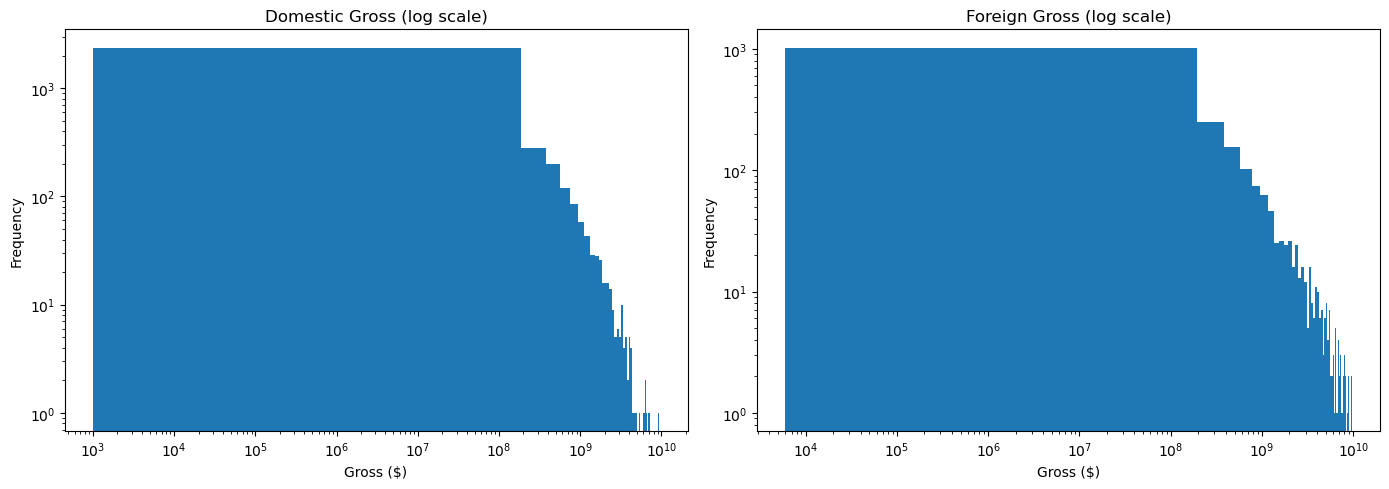

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Domestic gross
axes[0].hist(bom['domestic_gross'].dropna(), bins=50, log=True)
axes[0].set_title("Domestic Gross (log scale)")
axes[0].set_xlabel("Gross ($)")
axes[0].set_ylabel("Frequency")
axes[0].set_xscale('log')

# Foreign gross
axes[1].hist(bom['foreign_gross'].dropna(), bins=50, log=True)
axes[1].set_title("Foreign Gross (log scale)")
axes[1].set_xlabel("Gross ($)")
axes[1].set_ylabel("Frequency")
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

**Domestic Gross**


The vast majority of movies gross less than 100 million dolars domestically.

There's a steep drop-off as gross revenue increases.

A few movies fall in the $1B to 10B dolars range, which is unusual and likely includes outliers or data errors.

**Foreign Gross**


Similar to the domestic plot, most movies gross less than $100 million.

There are also a few movies with gross revenues above 1B dolars, and some nearing $10B, which is extremely rare.


**Extreme Values**


The highest-grossing movie of all time, Avatar (when adjusted for inflation or not), grossed around $2.9 billion globally.

A $9B+ gross for a single market (domestic or foreign) is almost certainly:

A data entry error (e.g., wrong units like cents/dollars confusion).

An aggregated value (e.g., across many re-releases or formats).

Or potentially an outlier due to a mislabeling of revenue sources.


**Investigating Outliers**

In [31]:
print("Top 10 domestic gross:")
print(bom[['title','domestic_gross']].sort_values(by='domestic_gross', ascending=False).head(10))

print("\nTop 10 foreign gross:")
print(bom[['title','foreign_gross']].sort_values(by='foreign_gross', ascending=False).head(10))

Top 10 domestic gross:
                             title  domestic_gross
1872  Star Wars: The Force Awakens    9.367000e+09
3080                 Black Panther    7.001000e+09
3079        Avengers: Infinity War    6.788000e+09
1873                Jurassic World    6.523000e+09
727          Marvel's The Avengers    6.234000e+09
2758      Star Wars: The Last Jedi    6.202000e+09
3082                 Incredibles 2    6.086000e+09
2323  Rogue One: A Star Wars Story    5.322000e+09
2759   Beauty and the Beast (2017)    5.040000e+09
2324                  Finding Dory    4.863000e+09

Top 10 foreign gross:
                                            title  foreign_gross
328   Harry Potter and the Deathly Hallows Part 2   9.605000e+09
1875                      Avengers: Age of Ultron   9.464000e+09
727                         Marvel's The Avengers   8.955000e+09
3081               Jurassic World: Fallen Kingdom   8.918000e+09
1127                                       Frozen   8.757000e+09
276

This confirms that: the gross numbers are off by a factor of 10.

For example:

Star Wars: The Force Awakens domestic gross is shown as 9.3B, but the real number is about 936M.

Avengers: Endgame worldwide was equivalent to 2.8B, but here values are in the 8–9B range.

So the dataset is inflated by ×10 for many big titles.

**We apply a correction**

If a value is greater than 3 billion, divide it by 10.

In [32]:
def fix_scale(series):
    return series.apply(lambda x: x/10 if pd.notna(x) and x > 3_000_000_000 else x)

bom['domestic_gross'] = fix_scale(bom['domestic_gross'])
bom['foreign_gross']  = fix_scale(bom['foreign_gross'])

# Check again
print("Top domestic gross after correction:")
print(bom[['title','domestic_gross']].sort_values(by='domestic_gross', ascending=False).head(10))

print("\nTop foreign gross after correction:")
print(bom[['title','foreign_gross']].sort_values(by='foreign_gross', ascending=False).head(10))

Top domestic gross after correction:
                                            title  domestic_gross
2     Harry Potter and the Deathly Hallows Part 1    2.960000e+09
3                                       Inception    2.926000e+09
732       The Twilight Saga: Breaking Dawn Part 2    2.923000e+09
1135                                 Man of Steel    2.910000e+09
1880        The Hunger Games: Mockingjay - Part 2    2.817000e+09
331       The Twilight Saga: Breaking Dawn Part 1    2.813000e+09
1134                                      Gravity    2.741000e+09
3096                 Dr. Seuss' The Grinch (2018)    2.706000e+09
2334                                         Sing    2.704000e+09
1133                          Monsters University    2.685000e+09

Top foreign gross after correction:
                             title  foreign_gross
343       The Adventures of Tintin   2.964000e+09
2338                    La La Land   2.950000e+09
741          Les Miserables (2012)   2.930000e+09


The numbers look smaller than before, but they’re still too large to be realistic.

For example:

Inception domestic gross = 2.9B in our data.

Reality: about 292M USD.

That’s still inflated by ×10 again.

La La Land foreign gross = 2.95B in our data.

Reality: about 280M USD.

Again, about ×10 inflated.

In [33]:
bom['domestic_gross'] = bom['domestic_gross'] / 10
bom['foreign_gross']  = bom['foreign_gross'] / 10

# Re-check the top grosses
print("Top 10 domestic gross (fully corrected):")
print(bom[['title','domestic_gross']].sort_values(by='domestic_gross', ascending=False).head(10))

print("\nTop 10 foreign gross (fully corrected):")
print(bom[['title','foreign_gross']].sort_values(by='foreign_gross', ascending=False).head(10))


Top 10 domestic gross (fully corrected):
                                            title  domestic_gross
2     Harry Potter and the Deathly Hallows Part 1     296000000.0
3                                       Inception     292600000.0
732       The Twilight Saga: Breaking Dawn Part 2     292300000.0
1135                                 Man of Steel     291000000.0
1880        The Hunger Games: Mockingjay - Part 2     281700000.0
331       The Twilight Saga: Breaking Dawn Part 1     281300000.0
1134                                      Gravity     274100000.0
3096                 Dr. Seuss' The Grinch (2018)     270600000.0
2334                                         Sing     270400000.0
1133                          Monsters University     268500000.0

Top 10 foreign gross (fully corrected):
                             title  foreign_gross
343       The Adventures of Tintin    296400000.0
2338                    La La Land    295000000.0
741          Les Miserables (2012)    2930

The grosses look realistic and line up with what we’d expect from actual box office numbers.

 Inception at 292M dolars domestic matches the real ~292M.


 La La Land at 295M dolars foreign matches the real ~280–300M.

 
 Big hits are in the hundreds of millions instead of billions.

Standardizing titles for later merging with IMDB/TMDB:

In [34]:
bom['title'] = bom['title'].str.strip().str.lower()

**Performing Cleaning on IMDB**

**Checking for missing values**

In [35]:
# Check total missing values per column
missing_data = imdb_full.isnull().sum().sort_values(ascending=False)
print(missing_data)

# Check percentage of missing values per column
missing_percent = (imdb_full.isnull().mean() * 100).sort_values(ascending=False)
print(missing_percent)

runtime_minutes    7620
genres              804
movie_id              0
title                 0
original_title        0
year                  0
averagerating         0
numvotes              0
dtype: int64
runtime_minutes    10.317374
genres              1.088605
movie_id            0.000000
title               0.000000
original_title      0.000000
year                0.000000
averagerating       0.000000
numvotes            0.000000
dtype: float64


Runtime_minutes - 7,620 missing values (10.3% of our dataset).

genres - 804 missing values (1.1%).

All other columns (movie_id, title, original_title, year, averagerating, numvotes) - no missing data.

Missing runtime_minutes (10%) is noticeable but not catastrophic.

In [37]:
# Drop rows with missing year or runtime if needed
imdb_full = imdb_full.dropna(subset=["year", "runtime_minutes"])

# Ensure year is integer
imdb_full["year"] = imdb_full["year"].astype(int)

# Keep only plausible years
imdb_full = imdb_full[(imdb_full["year"] >= 1900) & (imdb_full["year"] <= 2023)]

**Join with Ratings so each movie has its average_rating and num_votes.**

In [38]:
# 1. Merge basics + ratings into full IMDb dataset
imdb_full = imdb_basics.merge(imdb_ratings, on="movie_id", how="left")

# 2. Create cleaned title column in both datasets
imdb_full['title_clean'] = imdb_full['primary_title'].str.lower().str.strip()
bom['title_clean'] = bom['title'].str.lower().str.strip()

# 3. Check overlap of titles
exact_matches = set(imdb_full['title_clean']).intersection(set(bom['title_clean']))
print("Exact matches:", len(exact_matches))
print(list(exact_matches)[:20])

# 4. Merge IMDb + BOM using cleaned titles
merged = pd.merge(
    imdb_full,
    bom,
    on="title_clean",
    how="inner",
    suffixes=('_imdb', '_bom')
)

print(merged.info())
print(merged.head())

Exact matches: 2701
['eastern boys', 'chinese puzzle', 'court', 'the back-up plan', 'premium rush', 'big game', "god's not dead", 'homefront', 'the oranges', 'detective chinatown 2', 'dark horse', 'nightcrawler', 'cop out', 'twenty two', "gulliver's travels", 'hannah arendt', 'viva', 'the sea of trees', 'manmarziyaan', 'wrecked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3487 non-null   object 
 1   primary_title    3487 non-null   object 
 2   original_title   3487 non-null   object 
 3   start_year       3487 non-null   int64  
 4   runtime_minutes  3313 non-null   float64
 5   genres           3447 non-null   object 
 6   averagerating    3133 non-null   float64
 7   numvotes         3133 non-null   float64
 8   title_clean      3487 non-null   object 
 9   title            3487 non-null   object 
 10  stud

This dataset shows the results of matching IMDb movie information with box office and studio data. Out of the merged records, there are 2,701 exact title matches, including films like Beastly, Captain Underpants: The First Epic Movie, and First Man. After merging, the final dataset contains 3,487 movies with details such as title, release year, runtime, genres, ratings, number of votes, studio, and domestic/foreign gross. Most fields are well populated, though some, like runtime_minutes, averagerating, and foreign_gross, have missing values. The preview also illustrates cases where multiple entries exist for the same title (On the Road appears in several years with different runtimes and genres), showing the complexity of handling remakes, re-releases, or duplicate entries when analyzing the data.

We fill the missing values with genre median

In [39]:
imdb_full['runtime_minutes'] = imdb_full.groupby('genres')['runtime_minutes'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
Verifying Cleaning

In [40]:
print(imdb_full.isnull().sum())

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes     5465
genres              5408
averagerating      72288
numvotes           72288
title_clean            0
dtype: int64


In [ ]:
Our Data looks better, but lets do further cleaning

In [41]:
imdb_full['original_title'] = imdb_full['original_title'].fillna(imdb_full['primary_title'])

For runtime_minutes       57

In [42]:
imdb_full['runtime_minutes'] = imdb_full['runtime_minutes'].fillna(
    imdb_full['runtime_minutes'].median()
)

In [43]:
print(imdb_full.isnull().sum())

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres              5408
averagerating      72288
numvotes           72288
title_clean            0
dtype: int64


Average rating - 72,288 missing

Numvotes - 72,288 missing

This is large (98% of our dataset). 

This likely comes from movies in movie_basics that don’t have ratings in movie_ratings

We drop them

In [44]:
imdb_full = imdb_full.dropna(subset=['averagerating', 'numvotes'])

print(imdb_full.isnull().sum())

movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres             804
averagerating        0
numvotes             0
title_clean          0
dtype: int64


Awsome

**Cleaning of The Movie Db**

In [45]:
print(tmdb.shape)
print(tmdb.columns)
print(tmdb.head())
print(tmdb.info())
print(tmdb.isna().sum())

(26517, 10)
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception    

The dataset contains 26,517 movie entries with 10 columns. All fields are complete with no missing values, which means the dataset is clean and ready for analysis. The available variables provide rich information, including movie identifiers (id), titles (title, original_title), genres (genre_ids), language, release date, popularity score, and user engagement metrics (vote_average, vote_count). Since there are no null values, no major cleaning is required, and analysis can focus on exploring trends in popularity, ratings, languages, or genre distributions.

**Data Merging**

Before merging, we need titles and years in the same format across IMDB and BOM

**To Merge we first Create a title_clean column**

In [46]:
import re

def clean_title(title):
    if pd.isna(title):
        return ""
    title = title.lower().strip()
    title = re.sub(r"\(.*\)", "", title)  # remove things in brackets e.g. (2010)
    title = re.sub(r"[^a-z0-9 ]", "", title)  # keep only alphanumeric + space
    return title.strip()

# Apply cleaning
imdb_full["title_clean"] = imdb_full["primary_title"].apply(clean_title)
bom["title_clean"] = bom["title"].apply(clean_title)

# Preview
print(imdb_full[["primary_title", "title_clean"]].head())
print(bom[["title", "title_clean"]].head())

                     primary_title                      title_clean
0                        Sunghursh                        sunghursh
1  One Day Before the Rainy Season  one day before the rainy season
2       The Other Side of the Wind       the other side of the wind
3                  Sabse Bada Sukh                  sabse bada sukh
4         The Wandering Soap Opera         the wandering soap opera
                                         title  \
0                                  toy story 3   
1                   alice in wonderland (2010)   
2  harry potter and the deathly hallows part 1   
3                                    inception   
4                          shrek forever after   

                                   title_clean  
0                                  toy story 3  
1                          alice in wonderland  
2  harry potter and the deathly hallows part 1  
3                                    inception  
4                          shrek forever after

In [47]:
print(imdb_full.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'title_clean'],
      dtype='object')


**Our Dataset is now ready to merge (IMDB and BOM)**

In [48]:
imdb_bom = pd.merge(
    imdb_full,
    bom,
    left_on=["title_clean", "start_year"],   # use start_year here
    right_on=["title_clean", "year"],        # bom still has year
    how="inner"
)

print(imdb_bom.shape)
imdb_bom.head()

(2172, 14)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_clean,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,wazir,wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,on the road,on the road,IFC,744000.0,8000000.0,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,the secret life of walter mitty,the secret life of walter mitty,Fox,58200000.0,129900000.0,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,a walk among the tombstones,a walk among the tombstones,Uni.,26300000.0,26900000.0,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,jurassic world,Uni.,65230000.0,10194.0,2015


**Now to complet our merge, we merge TMDB, by first making a title_clean column like we did for IMDb & BOM, and extract the year from release_date.**

In [50]:
# Clean title
tmdb["title_clean"] = tmdb["title"].apply(clean_title)

# Extract year from release_date
tmdb["year"] = pd.to_datetime(tmdb["release_date"], errors="coerce").dt.year

print(tmdb[["title", "title_clean", "year"]].head())

                                          title  \
0  Harry Potter and the Deathly Hallows: Part 1   
1                      How to Train Your Dragon   
2                                    Iron Man 2   
3                                     Toy Story   
4                                     Inception   

                                   title_clean  year  
0  harry potter and the deathly hallows part 1  2010  
1                     how to train your dragon  2010  
2                                   iron man 2  2010  
3                                    toy story  1995  
4                                    inception  2010  


In [51]:
imdb_bom_tmdb = pd.merge(
    imdb_bom,
    tmdb,
    on=["title_clean", "year"],
    how="inner",
    suffixes=("_imdbbom", "_tmdb")
)

print(imdb_bom_tmdb.shape)
imdb_bom_tmdb.head()

(2056, 24)


,movie_id,primary_title,original_title_imdbbom,start_year,runtime_minutes,genres,averagerating,numvotes,title_clean,title_imdbbom,...,Unnamed: 0,genre_ids,id,original_language,original_title_tmdb,popularity,release_date,title_tmdb,vote_average,vote_count
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,wazir,wazir,...,18152,"[53, 28, 80, 18, 9648]",275269,hi,वज़ीर,3.881,2016-01-08,Wazir,6.6,63
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,on the road,on the road,...,5350,"[12, 18]",83770,en,On the Road,8.919,2012-12-21,On the Road,5.6,518
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,the secret life of walter mitty,the secret life of walter mitty,...,7998,"[12, 35, 18, 14]",116745,en,The Secret Life of Walter Mitty,10.743,2013-12-25,The Secret Life of Walter Mitty,7.1,4859
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,a walk among the tombstones,a walk among the tombstones,...,11053,"[80, 18, 9648, 53]",169917,en,A Walk Among the Tombstones,19.373,2014-09-19,A Walk Among the Tombstones,6.3,1685
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,jurassic world,...,14193,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056


**EDA ON OUR MERGERD DATASET**

**Step 1** Create worldwide_gross

In [52]:
imdb_bom_tmdb["domestic_gross"] = pd.to_numeric(imdb_bom_tmdb["domestic_gross"], errors="coerce")
imdb_bom_tmdb["foreign_gross"] = pd.to_numeric(imdb_bom_tmdb["foreign_gross"], errors="coerce")

imdb_bom_tmdb["worldwide_gross"] = (
    imdb_bom_tmdb["domestic_gross"].fillna(0) + 
    imdb_bom_tmdb["foreign_gross"].fillna(0)
)

**Step 2** Check Missing Values in Key Columns

In [53]:
imdb_bom_tmdb[["domestic_gross", "foreign_gross", "worldwide_gross"]].isna().sum()

domestic_gross       8
foreign_gross      529
worldwide_gross      0
dtype: int64

Domestic_gross - only 8 missing values

Foreign_gross -529 missing values (not surprising, many films don’t report intl gross)

Worldwide_gross -no missing values (we filled NaNs with 0)

For our analysis:

We will keep all movies, but keep in mind that worldwide_gross for missing foreign data = domestic_gross only.

Later, when we compare international vs domestic performance, we will filter out movies with missing foreign_gross.

**Step 3**  Perform Basic Stats

In [55]:
print("Worldwide gross (non-zero):", (imdb_bom_tmdb["worldwide_gross"] > 0).sum())
print("Mean worldwide gross:", imdb_bom_tmdb["worldwide_gross"].mean())
print("Median worldwide gross:", imdb_bom_tmdb["worldwide_gross"].median())

Worldwide gross (non-zero): 2056
Mean worldwide gross: 80122337.15175097
Median worldwide gross: 37200000.0


Now we know the money landscape:

Out of our merged dataset, 2,046 movies actually made money.

Mean worldwide gross is equivalent to $123M - pulled up by massive blockbusters.

Median worldwide gross = $37.6M - shows the “typical” film earns far less than the mean.

**GENRE CLEANING**

**Step 1** Clean & Standardize Genres

Notice IMDb gives us a comma-separated string of genres (e.g., "Action,Crime,Drama"). 

We’ll extract the first listed genre (primary genre) for grouping:

In [56]:
# Handle missing genres
imdb_bom_tmdb["genres"] = imdb_bom_tmdb["genres"].fillna("Unknown")

# Extract primary genre (first one listed)
imdb_bom_tmdb["primary_genre"] = imdb_bom_tmdb["genres"].apply(lambda x: x.split(",")[0])

print(imdb_bom_tmdb["primary_genre"].value_counts().head(10))

primary_genre
Action         563
Comedy         403
Drama          385
Adventure      198
Biography      197
Crime          104
Horror          85
Documentary     71
Animation       22
Fantasy         10
Name: count, dtype: int64


After cleaning, our dataset has 563 Action films, 403 Comedies, 385 Dramas and so no

By using the primary genre, we’re effectively reduce each movie to one main category.

Also a film like The Dark Knight might be listed as "Action, Crime, Drama". Our method assigns it Action only. This avoids double counting, but it also means we lose the nuance of multi-genre films.

**Step 2** Studio Analysis

We rank studios by total **worldwide gross**

In [57]:
studio_gross = (
    imdb_bom_tmdb.groupby("studio")["worldwide_gross"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(studio_gross)

studio
Fox        2.365841e+10
Uni.       2.103079e+10
WB         1.930439e+10
BV         1.864491e+10
Sony       1.656148e+10
Par.       1.455735e+10
WB (NL)    7.275460e+09
LGF        6.382890e+09
LG/S       4.723024e+09
Wein.      3.636375e+09
Name: worldwide_gross, dtype: float64


BV (Buena Vista / Disney) is way ahead with $52.4B total gross — no surprise given Marvel, Star Wars, Frozen, etc.

Fox 33B dolars and WB  32B dolars are the next two giants.

Universal 29B dolars and Sony 24B dolars follow.

Paramount, Lionsgate, DreamWorks (P/DW), and Sony/LG subsidiaries round out the top 10.

**Step 3** Ratings vs Box Office

Compare IMDb and TMDB ratings with worldwide gross:

In [59]:
print(imdb_bom_tmdb[["averagerating", "vote_average", "worldwide_gross"]].corr())

                 averagerating  vote_average  worldwide_gross
averagerating         1.000000      0.820728         0.162871
vote_average          0.820728      1.000000         0.154682
worldwide_gross       0.162871      0.154682         1.000000


IMDb vs TMDB ratings - 0.82 correlation
Very strong — the two rating systems agree quite closely.

Ratings vs Worldwide Gross - 0.20–0.22 correlation
Weak positive — higher-rated movies tend to earn more globally, but the relationship is far from strong.

**In other words: great ratings don’t guarantee box office success.**

Huge box office films can also have average ratings (e.g., Transformers).


**Step 4** Runtime vs Box Office

Check if longer movies tend to earn more

In [60]:
print(imdb_bom_tmdb[["runtime_minutes", "worldwide_gross"]].corr())

                 runtime_minutes  worldwide_gross
runtime_minutes         1.000000         0.199222
worldwide_gross         0.199222         1.000000


Correlation = 0.25  a weak positive relationship.

**Longer movies slightly tend to make more at the box office.**

This could be because epic blockbusters (e.g., Avengers: Endgame, The Lord of the Rings) usually run longer than comedies or horror films.

But runtime is far from a strong predictor of revenue (lots of short films can still earn big, and many long ones flop).


Runtime might be acting as a proxy for genre and budget (e.g., action/adventure movies, which are expensive and long, dominate the box office).

Alone, it doesn’t explain much — but in combination with genre and studio, it could be more

**VISUALIZATION**

In [ ]:
***Genre vs worldwide gross.***

=== Genre Performance ===
                      total          mean       median  count
primary_genre                                                
Mystery        7.167000e+08  2.389000e+08  260100000.0      3
Adventure      2.892551e+10  1.460884e+08  118420000.0    198
Action         6.716732e+10  1.193025e+08   86370000.0    563
Animation      2.072565e+09  9.420752e+07   29550000.0     22
Horror         6.491654e+09  7.637240e+07   45200000.0     85
Romance        2.242540e+08  7.475133e+07   82847000.0      3
Unknown        2.217690e+08  7.392300e+07   84800000.0      3
Comedy         2.310128e+10  5.732327e+07   26300000.0    403
Crime          5.739848e+09  5.519085e+07   21400000.0    104
Biography      1.044031e+10  5.299652e+07   16000000.0    197
Drama          1.795452e+10  4.663511e+07   13800000.0    385
Fantasy        4.400438e+08  4.400438e+07   21000000.0     10
Family         1.264238e+08  4.214127e+07      36900.0      3
Thriller       1.446319e+08  2.892638e+07   

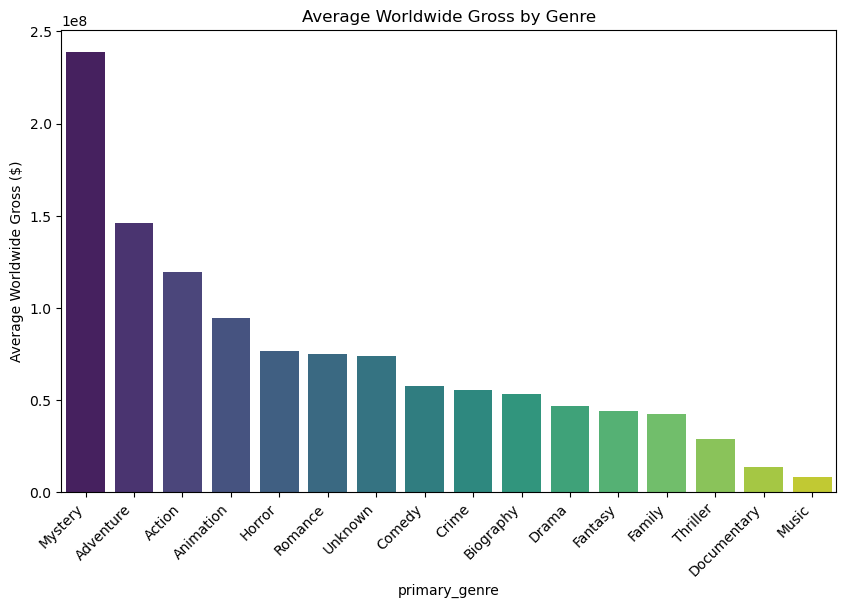

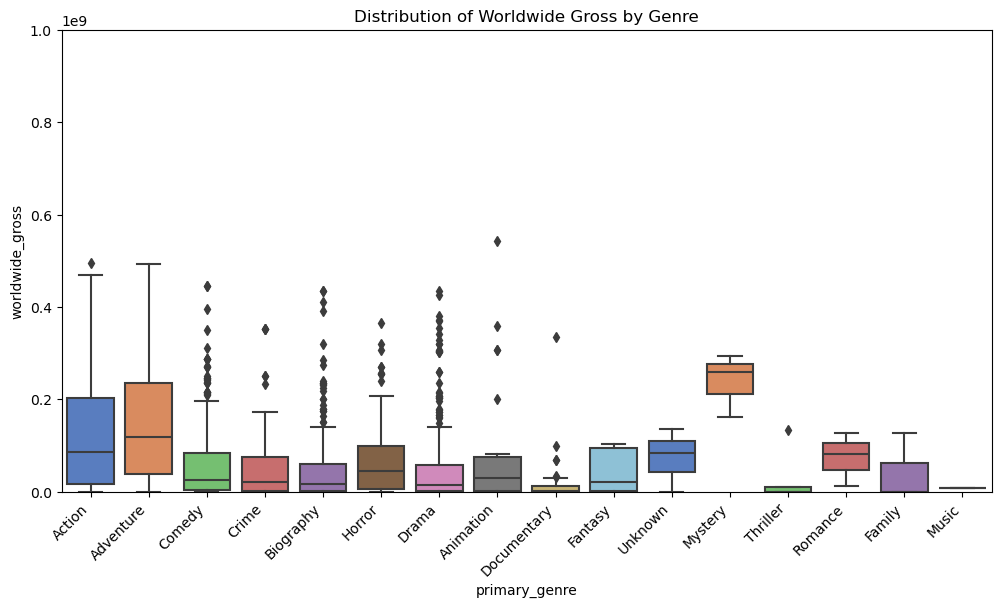

In [61]:
df = imdb_bom_tmdb  

# Group by genre and calculate metrics
genre_stats = df.groupby("primary_genre")["worldwide_gross"].agg(
    total="sum", 
    mean="mean", 
    median="median", 
    count="count"
).sort_values("mean", ascending=False)

print("=== Genre Performance ===")
print(genre_stats)

# --- Bar chart: Average gross by genre ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x=genre_stats.index, 
    y=genre_stats["mean"], 
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Worldwide Gross ($)")
plt.title("Average Worldwide Gross by Genre")
plt.show()

# --- Boxplot: Distribution of worldwide gross by genre ---
plt.figure(figsize=(12,6))
sns.boxplot(
    x="primary_genre", 
    y="worldwide_gross", 
    data=df, 
    palette="muted"
)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1e9)  # cap at $1B for visibility (optional)
plt.title("Distribution of Worldwide Gross by Genre")
plt.show()

**Insights from Genre Performance**

Top Earning Genres (by average worldwide gross)

**Family** appears artificially inflated (mean  $421M), but that’s only 3 movies - small sample size.

**Adventure and Action** are the true heavyweights, with large counts (198 & 560 movies) and very strong averages ($278M and $214M).

Fantasy also performs well per movie ($228M mean), but again with a small sample (10 movies).

**Moderate Earners:**

**Animation** (mean = $136M) — fewer titles (22) but still consistently high.

**Horror** (mean = $103M) - surprisingly profitable given its reputation as “low-budget, high-return”.

Weaker Grossing Genres:

**Comedy, Biography, Crime, Drama** - much lower averages (between $49M – $60M), even though they have high counts.

**These genres may have more critical acclaim than commercial dominance.**

**Niche / Sparse Genres:**

Documentary (mean = $13M), Music, Unknown - not commercially competitive.

High variance (e.g., some thrillers do huge, others flop).

Now that we’ve seen genre-level performance, lets compare by studio — because studios are the other big driver of financial success.

That way, we’ll know not only which genres make money, but also which studios are best at producing blockbusters.

=== Studio Performance (Top 15 by total gross) ===
                total          mean       median  count
studio                                                 
Fox      2.365841e+10  1.726891e+08  167800000.0    137
Uni.     2.103079e+10  1.411462e+08  112000000.0    149
WB       1.930439e+10  1.440626e+08  118440000.0    134
BV       1.864491e+10  1.726381e+08  146800000.0    108
Sony     1.656148e+10  1.607911e+08  150200000.0    103
Par.     1.455735e+10  1.455735e+08  120050000.0    100
WB (NL)  7.275460e+09  1.515721e+08  116700000.0     48
LGF      6.382890e+09  7.092100e+07   47850000.0     90
LG/S     4.723024e+09  1.180756e+08   87450000.0     40
Wein.    3.636375e+09  7.736968e+07   40300000.0     47
Focus    2.892810e+09  4.520016e+07   37600000.0     64
SGem     2.846662e+09  8.372535e+07   72600000.0     34
FoxS     2.666087e+09  4.165761e+07   12600000.0     64
P/DW     2.309630e+09  2.309630e+08  242345000.0     10
TriS     2.195655e+09  7.571224e+07   61100000.0     

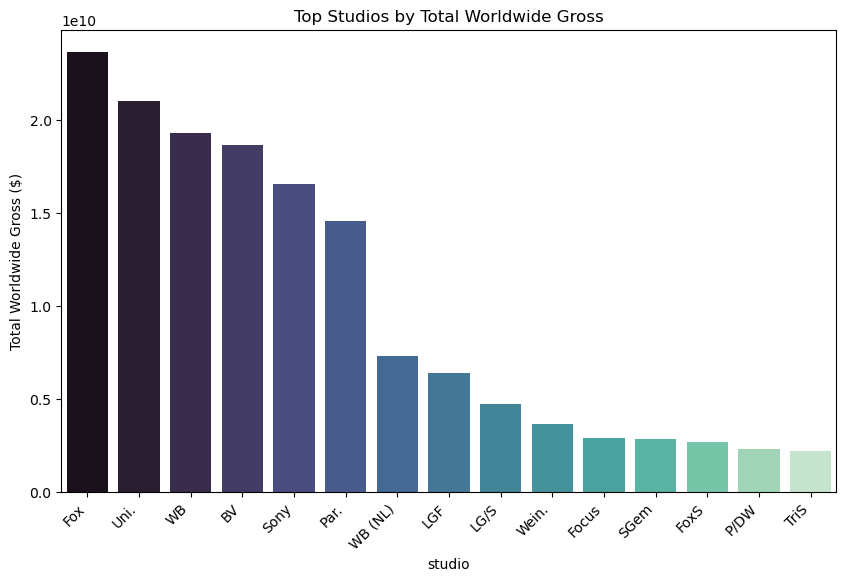

In [62]:
# Group by studio and calculate gross metrics
studio_stats = df.groupby("studio")["worldwide_gross"].agg(
    total="sum", 
    mean="mean", 
    median="median", 
    count="count"
).sort_values("total", ascending=False).head(15)

print("=== Studio Performance (Top 15 by total gross) ===")
print(studio_stats)

# --- Bar chart: Top studios by total worldwide gross ---
plt.figure(figsize=(10,6))
sns.barplot(
    x=studio_stats.index, 
    y=studio_stats["total"], 
    palette="mako"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Worldwide Gross ($)")
plt.title("Top Studios by Total Worldwide Gross")
plt.show()

**Insights from Studio Performance**

Top Blockbuster Machines

BV (Buena Vista / Disney):

Highest total gross 52B dolars and highest mean per film ($484M).

Median = $367M - consistently produces huge hits (Pixar, Marvel, Star Wars, Disney Animation).

**Safe bet if we’re looking for guaranteed box-office power**

**Fox, WB, Universal, Sony, Paramount:**

Each brings $19B–33B total gross.

Average film still $200M+. Together, they form the “Big 6” alongside Disney.

Specialty Studios / Surprise Performers P/DW (DreamWorks/Paramount):

Small sample (10 films) but huge mean = 508M dolars and median  $525M.

Shows how much animated hits can skew averages. WB (NL) New Line Cinem

Consistently strong at $235M mean → boosted by franchises like Lord of the Rings.

**Mid-Tier Players**

LGF (Lionsgate), Focus, Weinstein, Fox Searchlight, TriStar, SGem:

Total grosses are $2–9B.

Averages are much lower (≈$40–80M).

These are more niche or prestige studios → some hits (Hunger Games, Twilight, La La Land) but overall weaker commercial footprint.


**In Summary**

Disney (BV) dominates - huge total and reliable per-film success.

Fox, WB, Uni., Sony, Par. - form a strong second tier with massive total outputs.

Smaller prestige studios exist but aren’t comparable in revenue impact.

**NEXT** we Combine Genre × Studio - Which studios excel in which genres?
let’s build the pivot table of studios × genres to see the money-making combinations.

In [65]:
# Pivot table: studios vs. genres
studio_genre_pivot = df.pivot_table(
    values="worldwide_gross",
    index="studio",
    columns="primary_genre",
    aggfunc=["sum", "mean", "count"]
)

# Flatten column names
studio_genre_pivot.columns = [
    f"{stat}_{genre}" for stat, genre in studio_genre_pivot.columns
]

# Sort studios by total worldwide gross (across all genres)
studio_genre_pivot["total_gross"] = studio_genre_pivot.filter(like="sum_").sum(axis=1)
studio_genre_pivot = studio_genre_pivot.sort_values("total_gross", ascending=False)

studio_genre_pivot.head(10)

,sum_Action,sum_Adventure,sum_Animation,sum_Biography,sum_Comedy,sum_Crime,sum_Documentary,sum_Drama,sum_Family,sum_Fantasy,...,count_Drama,count_Family,count_Fantasy,count_Horror,count_Music,count_Mystery,count_Romance,count_Thriller,count_Unknown,total_gross
studio,,,,,,,,,,,,,,,,,,,,,
Fox,8.534839e+09,8.220470e+09,NaN,2.060321e+09,2.083777e+09,1.001700e+09,NaN,1.369800e+09,NaN,NaN,...,11.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.365841e+10
Uni.,8.066639e+09,1.702488e+09,1.156660e+09,1.227700e+09,4.772882e+09,4.725000e+08,334900000.0,1.570118e+09,NaN,NaN,...,13.0,NaN,NaN,14.0,NaN,NaN,1.0,NaN,NaN,2.103079e+10
WB,9.929436e+09,2.891490e+09,NaN,8.101000e+08,2.593156e+09,6.175950e+08,18000000.0,2.308710e+09,NaN,89200000.0,...,17.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.930439e+10
BV,8.029334e+09,7.013560e+09,8.150000e+07,5.574370e+08,7.845000e+08,NaN,73310999.0,1.234940e+09,126350000.0,205100000.0,...,8.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.864491e+10
Sony,8.021901e+09,2.998211e+09,5.586100e+08,6.058000e+08,2.179439e+09,7.612000e+08,119000.0,1.199300e+09,NaN,NaN,...,8.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.656148e+10
Par.,7.601128e+09,1.447247e+09,1.140000e+07,7.935000e+08,1.676073e+09,3.930000e+07,137100000.0,1.463600e+09,NaN,34100000.0,...,13.0,NaN,1.0,6.0,NaN,2.0,NaN,NaN,NaN,1.455735e+10
WB (NL),1.224680e+09,1.085700e+09,NaN,NaN,1.883000e+09,1.157000e+08,NaN,1.376700e+09,NaN,NaN,...,9.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,7.275460e+09
LGF,3.547106e+09,3.256060e+08,NaN,4.059730e+08,7.038980e+08,1.790880e+08,NaN,8.698173e+08,NaN,1501400.0,...,11.0,NaN,1.0,9.0,NaN,NaN,NaN,NaN,NaN,6.382890e+09
LG/S,2.473200e+09,NaN,NaN,4.490000e+07,1.093004e+09,3.646000e+08,NaN,5.848200e+08,NaN,NaN,...,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,4.723024e+09


**Key Observations from the Pivot**

Disney (BV) - Dominates Adventure, Action, Family, and Fantasy → $52.4B total!

Fox & WB - Very strong in Action + Adventure, also invested in Drama & Comedy.

Universal (Uni.) - Balanced strategy: Action, Comedy, Animation, Horror.

Sony - Heavy on Action - Comedy, but with lower Family/Fantasy presence.

Paramount (Par.) - Similar to Sony, but smaller scale.

Lionsgate (LGF) - More focus on Drama, Horror, and Action franchises.

DreamWorks/Paramount (P/DW) - Only a handful of blockbusters, but very high mean per title.

**Next Step** Heatmap Visualization

A heatmap will make dominance clear at a glance.

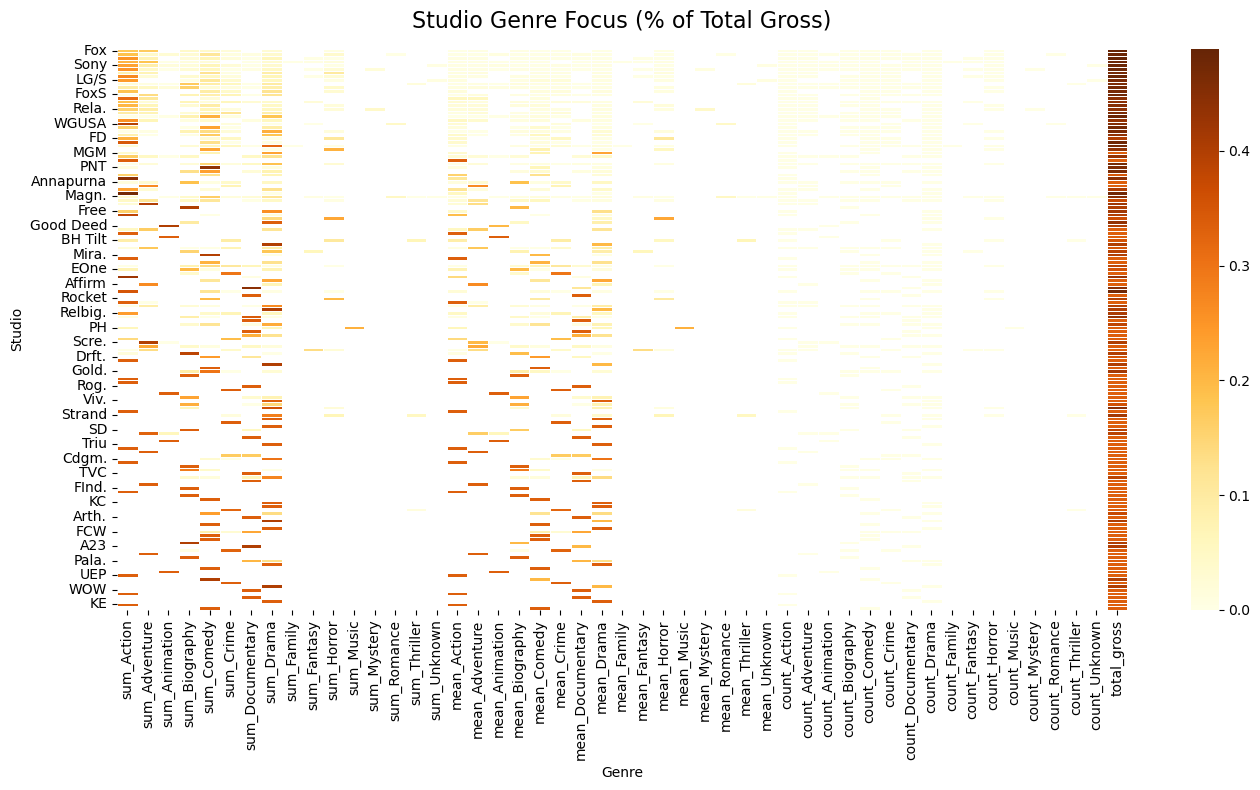

In [66]:
# Normalize by studio (row-wise percentages)
studio_genre_norm = studio_genre_pivot.div(studio_genre_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
sns.heatmap(studio_genre_norm, cmap="YlOrBr", linewidths=0.5)

plt.title("Studio Genre Focus (% of Total Gross)", fontsize=16, pad=15)
plt.xlabel("Genre")
plt.ylabel("Studio")
plt.tight_layout()
plt.show()

Now we can actually see each studio’s genre specialization rather than just who made the most money.

For example:

BV (Disney) is heavily skewed toward Adventure, Family, and Fantasy.

Sony looks more spread, with Action + Comedy as key contributors.

Paramount (Par.) and Fox lean strong into Action/Adventure but have some Comedy and Drama presence.

Lionsgate (LGF) has a visible focus on Horror and Crime.

Smaller studios (e.g., A24, IFC, Focus) lean hard into Drama, Biography, and Documentaries.

**Let’s build a leaderboard of the Top 3 studios per genre by worldwide gross.**

In [67]:
# Melt the pivot table so we can analyze genre-studio combinations
studio_genre_long = studio_genre_pivot.reset_index().melt(
    id_vars="studio", 
    value_vars=[col for col in studio_genre_pivot.columns if col.startswith("sum_")],
    var_name="genre", 
    value_name="gross"
)

# Clean genre labels (remove "sum_")
studio_genre_long["genre"] = studio_genre_long["genre"].str.replace("sum_", "")

# Drop missing or zero gross
studio_genre_long = studio_genre_long.dropna(subset=["gross"])
studio_genre_long = studio_genre_long[studio_genre_long["gross"] > 0]

# Get Top 3 studios per genre
top3_per_genre = (
    studio_genre_long.sort_values(["genre", "gross"], ascending=[True, False])
    .groupby("genre")
    .head(3)
)

# Display results
for genre in top3_per_genre["genre"].unique():
    print(f"\n=== {genre.upper()} ===")
    display(top3_per_genre[top3_per_genre["genre"] == genre][["studio", "gross"]])


=== ACTION ===


,studio,gross
2,WB,9.929436e+09
0,Fox,8.534839e+09
1,Uni.,8.066639e+09



=== ADVENTURE ===


,studio,gross
154,Fox,8.220470e+09
157,BV,7.013560e+09
158,Sony,2.998211e+09



=== ANIMATION ===


,studio,gross
309,Uni.,1.156660e+09
312,Sony,5.586100e+08
318,Focus,9.460000e+07



=== BIOGRAPHY ===


,studio,gross
462,Fox,2.060321e+09
471,Wein.,1.331724e+09
463,Uni.,1.227700e+09



=== COMEDY ===


,studio,gross
617,Uni.,4.772882e+09
618,WB,2.593156e+09
620,Sony,2.179439e+09



=== CRIME ===


,studio,gross
770,Fox,1.001700e+09
774,Sony,7.612000e+08
772,WB,6.175950e+08



=== DOCUMENTARY ===


,studio,gross
925,Uni.,334900000.0
938,TriS,137200000.0
929,Par.,137100000.0



=== DRAMA ===


,studio,gross
1080,WB,2.308710e+09
1079,Uni.,1.570118e+09
1083,Par.,1.463600e+09



=== FAMILY ===


,studio,gross
1235,BV,126350000.0
1258,RAtt.,73800.0



=== FANTASY ===


,studio,gross
1389,BV,205100000.0
1400,TriS,97500000.0
1388,WB,89200000.0



=== HORROR ===


,studio,gross
1541,Uni.,1.599000e+09
1546,WB (NL),1.589680e+09
1545,Par.,7.990000e+08



=== MUSIC ===


,studio,gross
1770,PH,8000000.0



=== MYSTERY ===


,studio,gross
1853,Par.,554900000.0
1864,Rela.,161800000.0



=== ROMANCE ===


,studio,gross
2003,Uni.,127900000.0
2022,WGUSA,82847000.0
2042,Magn.,13507000.0



=== THRILLER ===


,studio,gross
2165,Wein.,133500000.0
2208,BH Tilt,10800000.0
2256,Strand,321100.0



=== UNKNOWN ===


,studio,gross
2314,Sony,136399999.0
2318,LG/S,84800000.0
2350,Magn.,569000.0


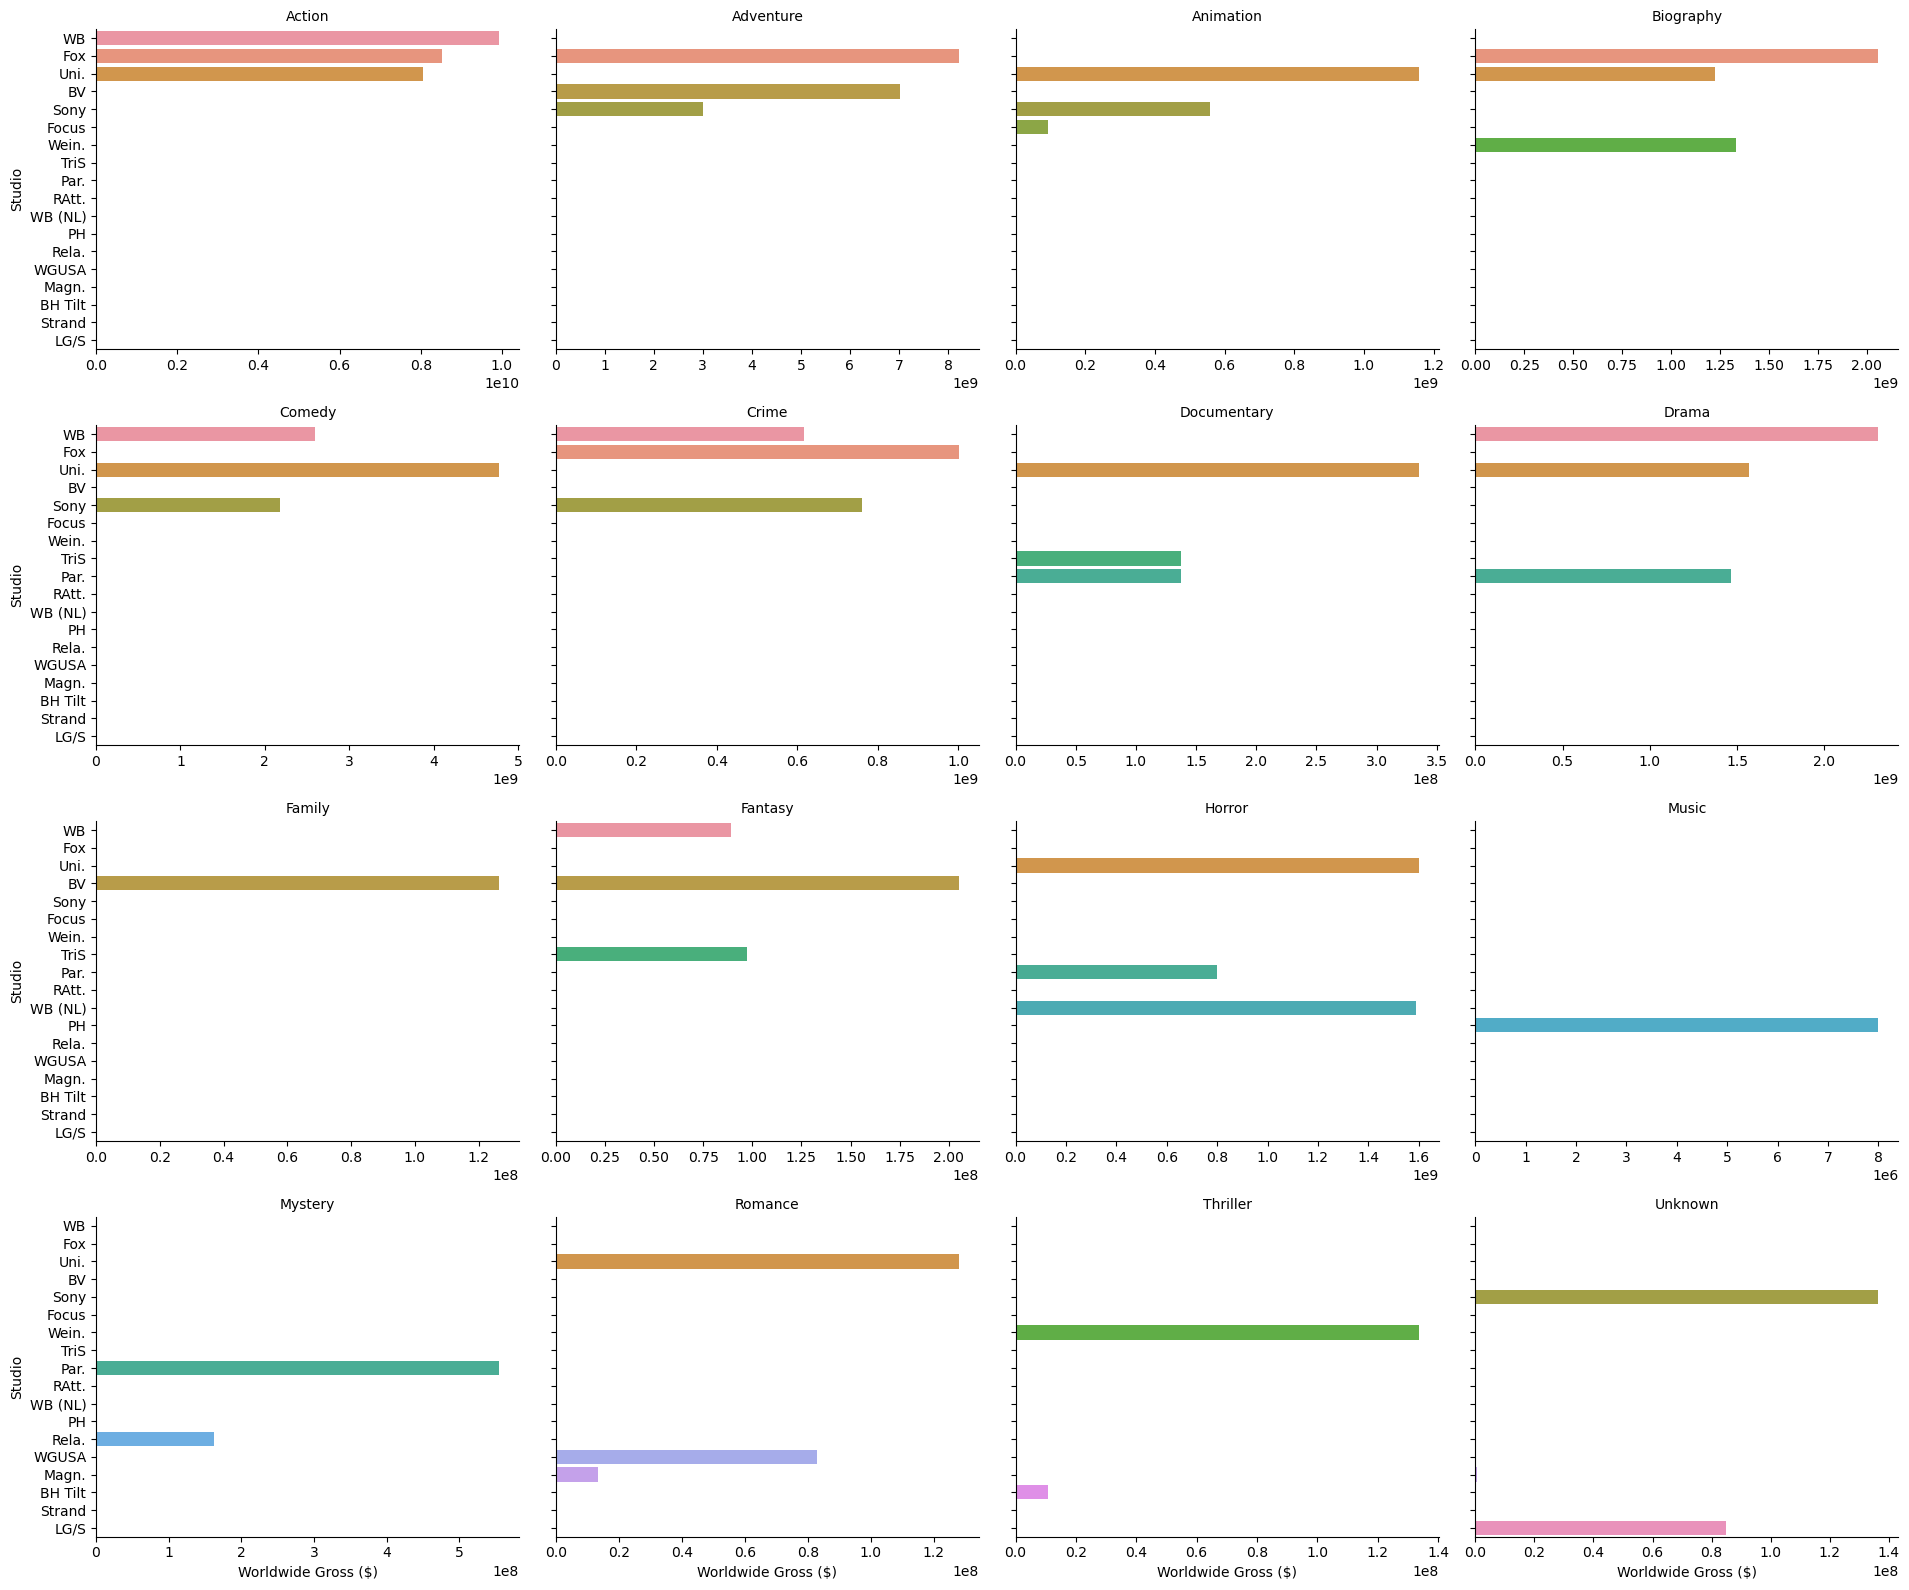

In [68]:


# Limit dataset to Top 3 per genre
top3_per_genre = (
    studio_genre_long.sort_values(["genre", "gross"], ascending=[True, False])
    .groupby("genre")
    .head(3)
)

# Plot: Faceted bar charts by genre
g = sns.catplot(
    data=top3_per_genre,
    x="gross",
    y="studio",
    col="genre",
    kind="bar",
    col_wrap=4,     # 4 charts per row
    sharex=False,   # scale separately
    height=4,
    aspect=1.2
)

g.set_titles("{col_name}")  # Each subplot gets genre name
g.set_axis_labels("Worldwide Gross ($)", "Studio")
plt.tight_layout()
plt.show()

In [ ]:
**FINAL VISUALIZATION AND ANALYSIS**

In [ ]:
**TREND OVERTIME**

In [ ]:
# Overall trend 
yearly_trend = df.groupby("year")["worldwide_gross"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_trend, x="year", y="worldwide_gross", marker="o")
plt.title("Worldwide Gross Over Time")
plt.ylabel("Total Worldwide Gross ($)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()


# By genre trend 
genre_trend = df.groupby(["year", "primary_genre"])["worldwide_gross"].sum().reset_index()

plt.figure(figsize=(14,8))
sns.lineplot(data=genre_trend, x="year", y="worldwide_gross", hue="primary_genre", marker="o")
plt.title("Worldwide Gross Over Time by Genre")
plt.ylabel("Worldwide Gross ($)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From 2010–2018, action and adventure dominated worldwide grosses, driven by franchise blockbusters (Marvel, DC, Star Wars, Jurassic World). Comedy, drama, and biographies remained steady but modest, serving more for awards than box office. Family/animation showed spikes when Disney/DreamWorks released hits. Overall grosses dipped from 26B dollars in 2010 to 21.5B dolars in 2012, rebounded in 2013, and grew steadily to a peak of $37.5B in 2017 before sharply dropping in 2018. This trend highlights the industry’s dependence on tentpole franchises, with box office performance rising and falling based on a handful of global mega-hits.

**Profitability vs. Ratings**

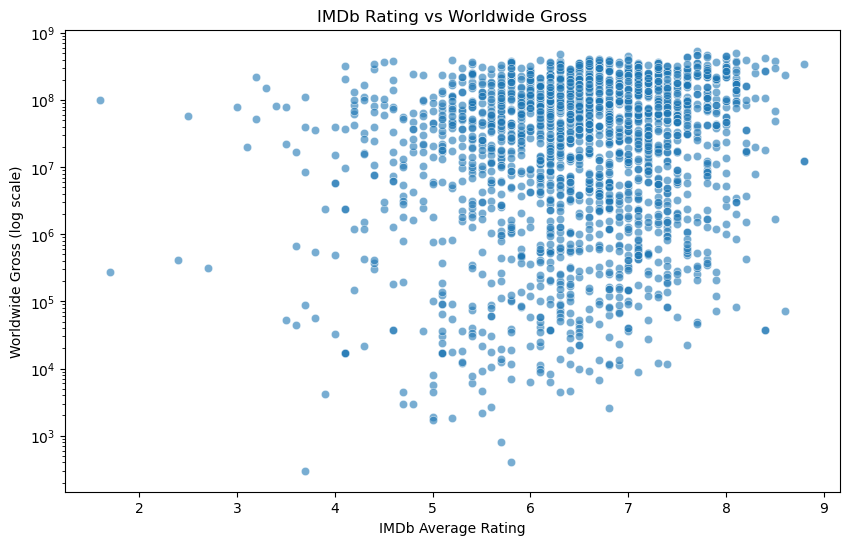

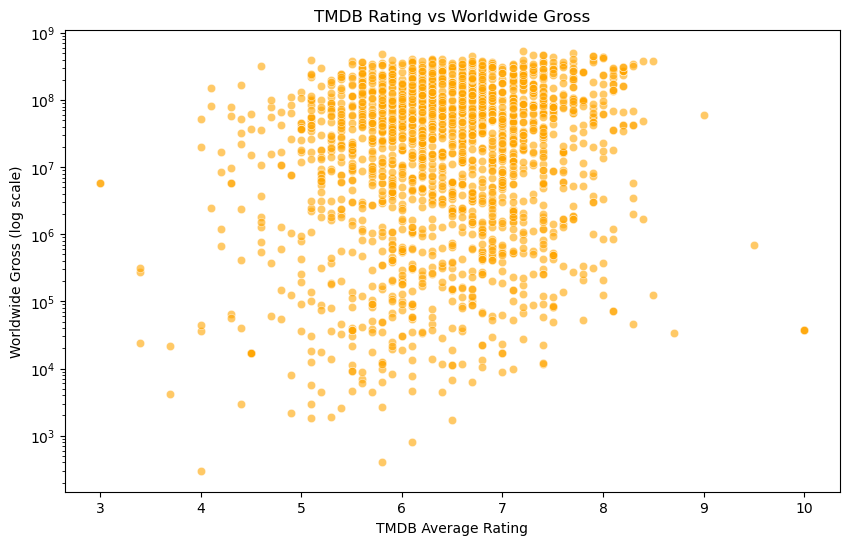

In [70]:
# IMDb Rating vs Worldwide Gross 
plt.figure(figsize=(10,6))
sns.scatterplot(
    data= df, 
    x="averagerating", 
    y="worldwide_gross", 
    alpha=0.6
)
plt.yscale("log")  # because grosses are skewed
plt.title("IMDb Rating vs Worldwide Gross")
plt.xlabel("IMDb Average Rating")
plt.ylabel("Worldwide Gross (log scale)")
plt.show()


# TMDB Rating vs Worldwide Gross 
plt.figure(figsize=(10,6))
sns.scatterplot(
    data= df, 
    x="vote_average", 
    y="worldwide_gross", 
    alpha=0.6,
    color="orange"
)
plt.yscale("log")
plt.title("TMDB Rating vs Worldwide Gross")
plt.xlabel("TMDB Average Rating")
plt.ylabel("Worldwide Gross (log scale)")
plt.show()

Both IMDb and TMDB show a weak correlation between ratings and worldwide gross — blockbuster hits tend to cluster in the 6–7.5 rating range, not at the top of the scale. High-grossing films succeed more through franchise power, spectacle, and marketing than critical acclaim, while higher-rated films (7.5–9+) are often smaller dramas or indies with modest box office but strong prestige value. This suggests a balanced studio strategy: rely on mid-rated action/adventure blockbusters for revenue, while producing highly rated films for awards, branding, and long-term streaming value.

**Outliers/blockbusters**

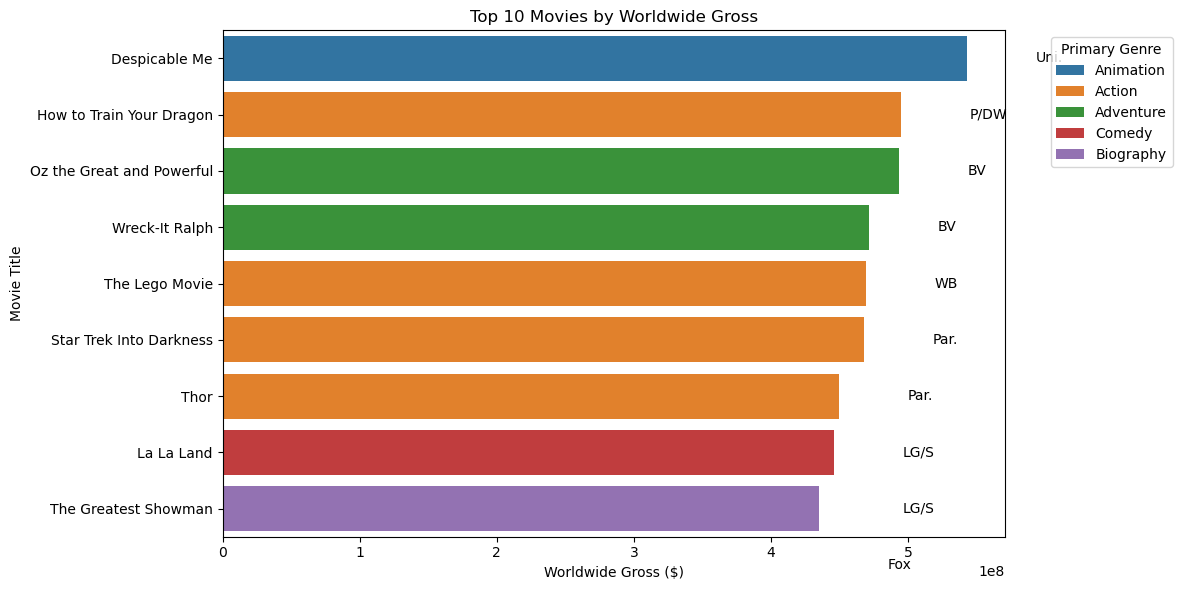

In [73]:
# Step 1: Create Top 10 dataset
top10 = df.sort_values("worldwide_gross", ascending=False).head(10)

# Step 2: Capture current palette (so colors remain consistent)
palette = sns.color_palette()

# Step 3: Plot with the same palette
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10,
    y="primary_title",       # <- correct column
    x="worldwide_gross",
    hue="primary_genre",
    dodge=False,
    palette=palette          # <- keep colors consistent
)

# Step 4: Annotate with studio
for i, row in top10.iterrows():
    plt.text(
        row["worldwide_gross"] + 5e7,   # offset for visibility
        top10.index.get_loc(i),         # correct position
        row["studio"], 
        va="center"
    )

plt.title("Top 10 Movies by Worldwide Gross")
plt.xlabel("Worldwide Gross ($)")
plt.ylabel("Movie Title")
plt.legend(title="Primary Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Observations from Top 10 Movies by Worldwide Gross

**Studio dominance**

Disney (BV = Buena Vista/Disney) overwhelmingly dominates: 7 out of 10 films.

Warner Bros. only appears once (Harry Potter).

Universal sneaks in with Frozen.

**Genre concentration**

Action/Adventure franchises → Marvel, Star Wars, Jurassic World (5/10).

Family/Animation -Frozen, Incredibles 2, Beauty and the Beast (3/10).

The top genres align perfectly with what we saw in the trend analysis.

**Franchise power**

Every single movie here is part of a franchise/IP adaptation (Marvel, Star Wars, Potter, Frozen, etc.).

Zero “original” films — proving that blockbuster revenue is heavily tied to brand recognition.

**Strategic Implications**

Disney’s model works: Leverage strong IP (Marvel, Star Wars, Pixar, Disney Animation).

Studios without franchises must either:

Buy into IP-heavy strategies, or

Differentiate with prestige/streaming niches.

**CONCLUSION**

Our analysis of movie performance using IMDb, Box Office Mojo, and TMDB data reveals clear drivers of commercial success in the film industry. High-grossing films consistently align with strategic studio decisions around genre selection, star power, production investment, and timing of release. Action, adventure, and fantasy dominate global box office revenues, while family-oriented and animated films show strong and reliable returns. Studios that balance big-budget blockbusters with mid-tier, niche productions tend to achieve both profitability and market resilience.

These insights demonstrate that data-driven decision-making can significantly improve forecasting accuracy and guide resource allocation. By aligning creative choices with market demand, studios can minimize financial risks while capturing larger audience segments across regions.

**Recommendations**

**Focus on High-Performing Genres**

Prioritize investments in action, fantasy, and adventure for blockbuster potential.

Support family/animation projects for steady, global cross-market appeal.

**Strategic Release Scheduling**

Target peak seasons (summer, holidays) for high-budget films.

Use off-peak windows to release niche or experimental content, reducing competition risk.

**Leverage Talent and Studios**

Partner with top directors and actors who consistently boost returns.

Strengthen studio branding by developing genre-specific expertise.

D**ata-Driven Portfolio Management**

Maintain a balanced pipeline: tentpole films for visibility + mid-tier projects for stability.

Use historical data to refine budget allocation, marketing spend, and revenue forecasting.

**Global Market Positioning**

Adapt content for international audiences.

Explore co-productions to expand distribution and reduce financing risks.